## Практическое задание по курсу "Теория линейных измерительно-вычислительных систем (ИВС)"
Преподаватель А.В. Зубюк</br>
выполнил студет Голев А.С. 2022
## Задача
Реализовать программно действие сопряженного опреатора **A\***, воспользовавшись определением **(Ax,y) = (x,A\*y)** и тем,</br> что в качестве вектора x могут быть использованы элементы ортонормированного базиса.
## Оператор
Интегрирующая **RL-цепь**

#### Заметки
Линейный оператор A*  называется сопряженным к A, если для любых x,y (Ax,y) = (x,A*y)</br></br>
Операцию интегрирования, по аналогии с дифференцированием,  можно представить как действие оператора. Для этого достаточно рассмотреть приближенное вычисление площади под кривой, разбив ее на конечное число точек и суммируя вклад каждого из прямоугольников.
Декартовы y-координаты дискретной функции можно записать в вектор-столбец:</br>
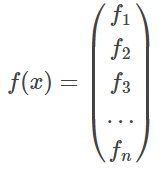
</br>
А интегрирование можно записать в виде умножения матриц:</br>
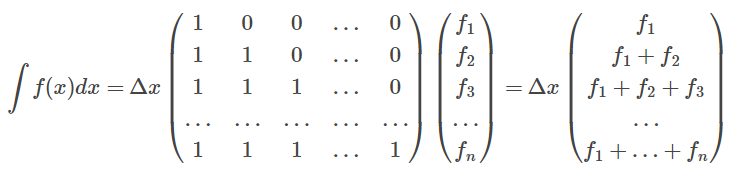

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Signals import meander_in, rectang_in, triang_in, sin_in, discSin_in, quantSin_in

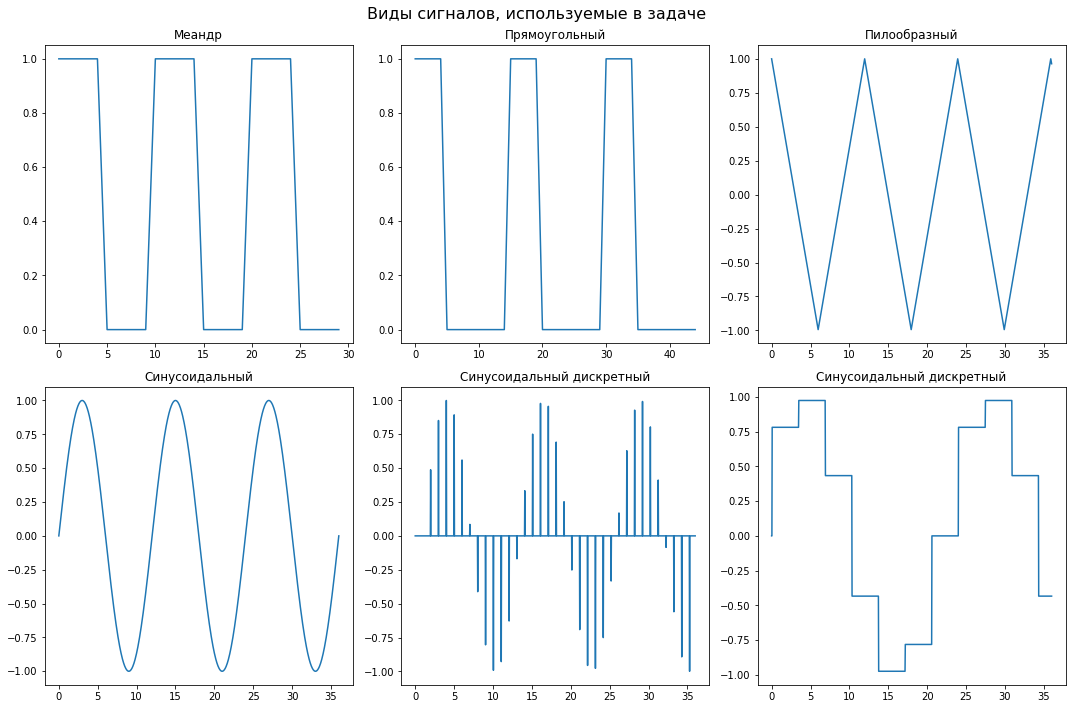

In [3]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
axs[0,0].plot(meander_in(10,3))
axs[0,0].set_title('Меандр')
axs[0,1].plot(rectang_in(10,3))
axs[0,1].set_title('Прямоугольный')
x = np.linspace(0, 36, 1000)
axs[0,2].plot(x,triang_in(x.tolist(),3)[0:1000])
axs[0,2].set_title('Пилообразный')
axs[1,0].plot(x,sin_in(x.tolist(),3))
axs[1,0].set_title('Синусоидальный')
axs[1,1].plot(x,discSin_in(x.tolist(),1,3)[0:1000])
axs[1,1].set_title('Синусоидальный дискретный')
axs[1,2].plot(x,quantSin_in(x.tolist(),7,1.5)[0:1000])
axs[1,2].set_title('Синусоидальный квантованый')
fig.suptitle('Виды сигналов, используемые в задаче', fontsize=16)
plt.tight_layout()
plt.show()

Имеем интегрирующий оператор RL цепи </br>
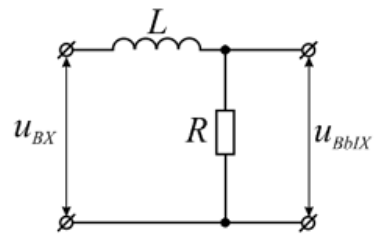</br>
для RL цепи имеем:
$$L\dfrac{dI}{dt}+IR=U_{in}$$
$$U_{out}=IR$$

из системы получаем:
$$\frac{du_{out}}{dt} = (u_{in}-u_{out})\frac{L}{R} $$

Запишем в разностном виде:

$$\dfrac{dU_{out}^{i}}{dt}=\dfrac{1}{\alpha}\left( U_{in}^{i}-U_{out}^{i}\right)=\dfrac{U_{out}^{i+1}-U_{out}^{i}}{\tau }$$

$$U_{out}^{i}=\dfrac{U_{out}^{i+1}-U_{in}^{i}}{1-\dfrac{\tau }{\alpha }}$$

Таким образом, получаем:

$$Ax\left( t\right) =\dfrac{1}{\alpha }\int ^{t}_{0}x\left( \tau \right) d\tau ,\alpha =\dfrac{L}{R}$$

In [5]:
def u_out(Uin_next, Uout, tau):
    return (tau*Uin_next  + Uout)/(tau + 1)

In [6]:
def A_RL(inpuT, tau):  #tau = L/R
    Uin = inpuT
    Uout = [0]
    for idx in range(1, len(inpuT)):
        Uout.append(u_out(Uin[idx], Uout[idx-1], tau)) 
    return Uout

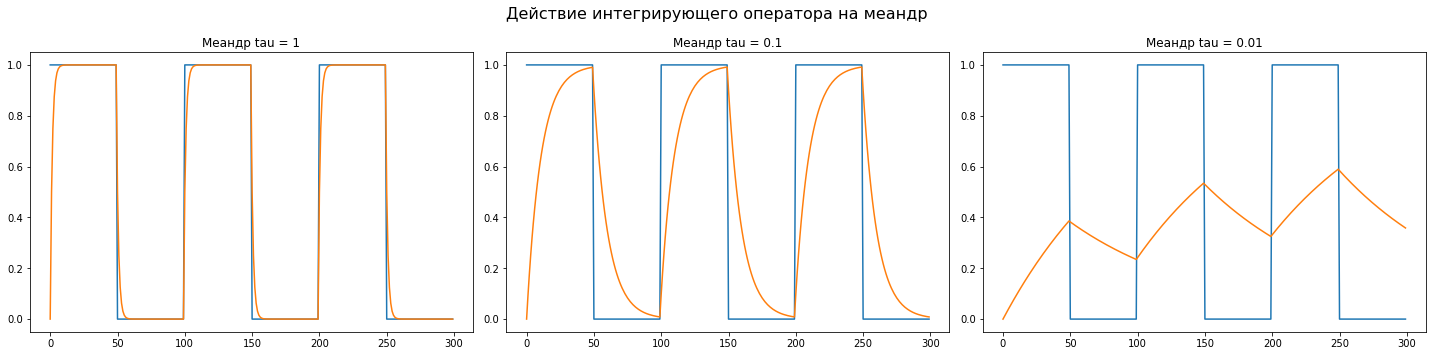

In [162]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
x = meander_in(100,3)
axs[0].plot(x)
axs[0].plot(A_RL(x,1))
axs[0].set_title('Меандр tau = 1')
x = meander_in(100,3)
axs[1].plot(x)
axs[1].plot(A_RL(x,0.1))
axs[1].set_title('Меандр tau = 0.1')
x = meander_in(100,3)
axs[2].plot(x)
axs[2].plot(A_RL(x,0.01))
axs[2].set_title('Меандр tau = 0.01')

fig.suptitle('Действие интегрирующего оператора на меандр', fontsize=16)
plt.tight_layout()
plt.show()

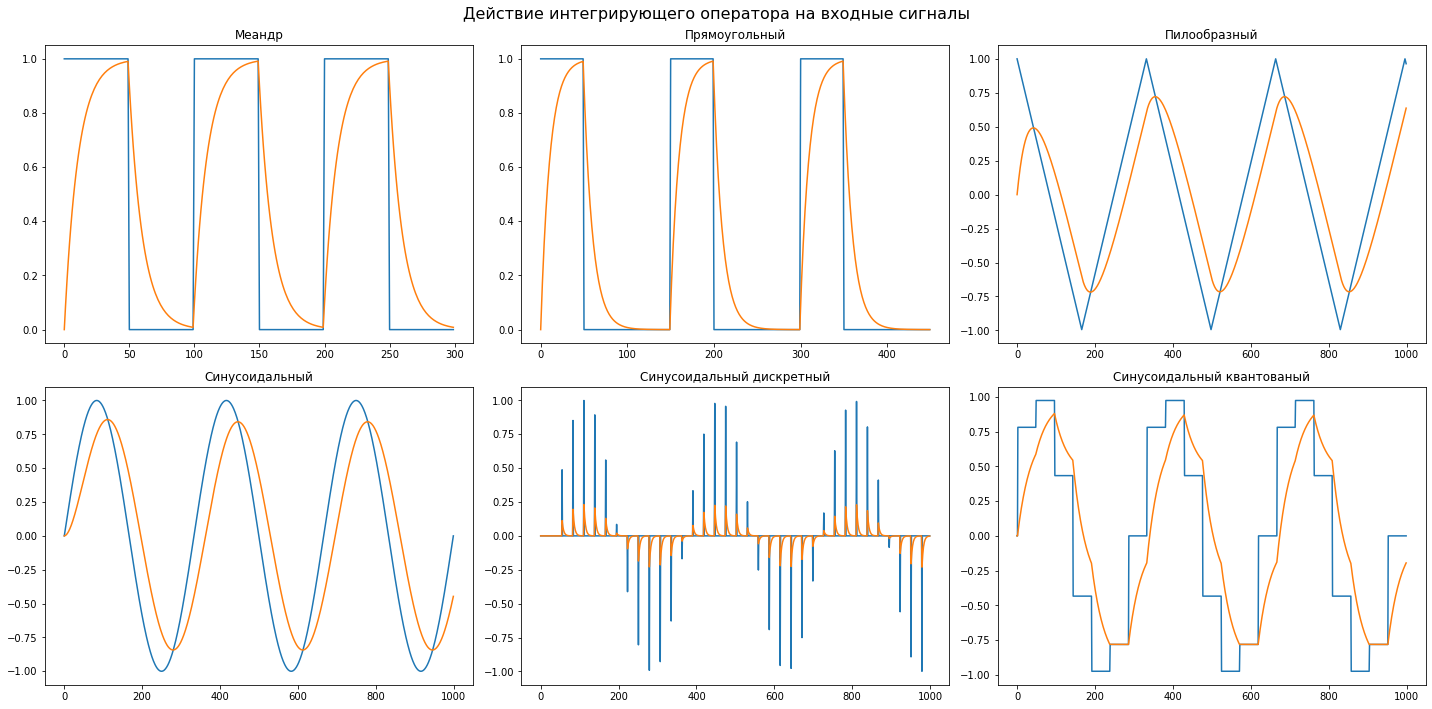

In [9]:
fig, axs = plt.subplots(2,3,figsize=(20,10))
x = meander_in(100,3)
axs[0,0].plot(x)
axs[0,0].plot(A_RL(x,0.1))
axs[0,0].set_title('Меандр')
x = rectang_in(100,3)
axs[0,1].plot(x)
axs[0,1].plot(A_RL(x,0.1))
axs[0,1].set_title('Прямоугольный')
x2 = np.linspace(0, 36, 1000)
x= triang_in(x2.tolist(),3)[0:1000]
axs[0,2].plot(x)
axs[0,2].plot(A_RL(x,0.03))
axs[0,2].set_title('Пилообразный')
x = sin_in(x2.tolist(),3)
axs[1,0].plot(x)
axs[1,0].plot(A_RL(x,0.03))
axs[1,0].set_title('Синусоидальный')
x= discSin_in(x2.tolist(),1,3)[0:1000]
axs[1,1].plot(x)
axs[1,1].plot(A_RL(x,0.3))
axs[1,1].set_title('Синусоидальный дискретный')
x = quantSin_in(x2.tolist(),7,3)[0:1000]
axs[1,2].plot(x)
axs[1,2].plot(A_RL(x,0.03))
axs[1,2].set_title('Синусоидальный квантованый')
fig.suptitle('Действие интегрирующего оператора на входные сигналы', fontsize=16)
plt.tight_layout()
plt.show()

Для построения сопряжённого оператора воспользуемся определением: (Ax,y) = (x,A*y) для любых x,y</br>
Теперь применяем определение и рассматриваем следующее скалярное произведение:</br>
(Ax,y) = ...здесь нужно сделать выкладку... = (x,A*y)</br>
в итоге мы нахоходим сопряжённый оператор </br>

 $$(Ax,y)= \int_0^1Ax(t)y(t)dt = \int_0^1 (\int_0^t x(\tau)d\tau) * y(t)dt = $$
 $$= \int_0^1 x(t)(\int_t^1 y(\tau)d\tau)dt= \int_0^1x(t)A^*y(t)dt = (x,A^*y)$$
 $$= >A^{\ast }y\left( t\right) =\int ^{T}_{t}y\left( \tau \right) d\tau$$
$$

Получается, что
$$ \int_0^T x(t)dt = Ax(T) = \int_0^tx(t)dt + \int_t^Tx(t)dt = Ax(t)+A^{*}x(t)$$
$$A^{*}x(t)= Ax(T) - Ax(t) $$

In [11]:
def Asopr_RL(Uout1):
    Uout2 = np.zeros(len(Uout1))
    for i in range(0, len(Uout1)):
        Uout2[i] = Uout1[-1] - Uout1[i]
    return Uout2

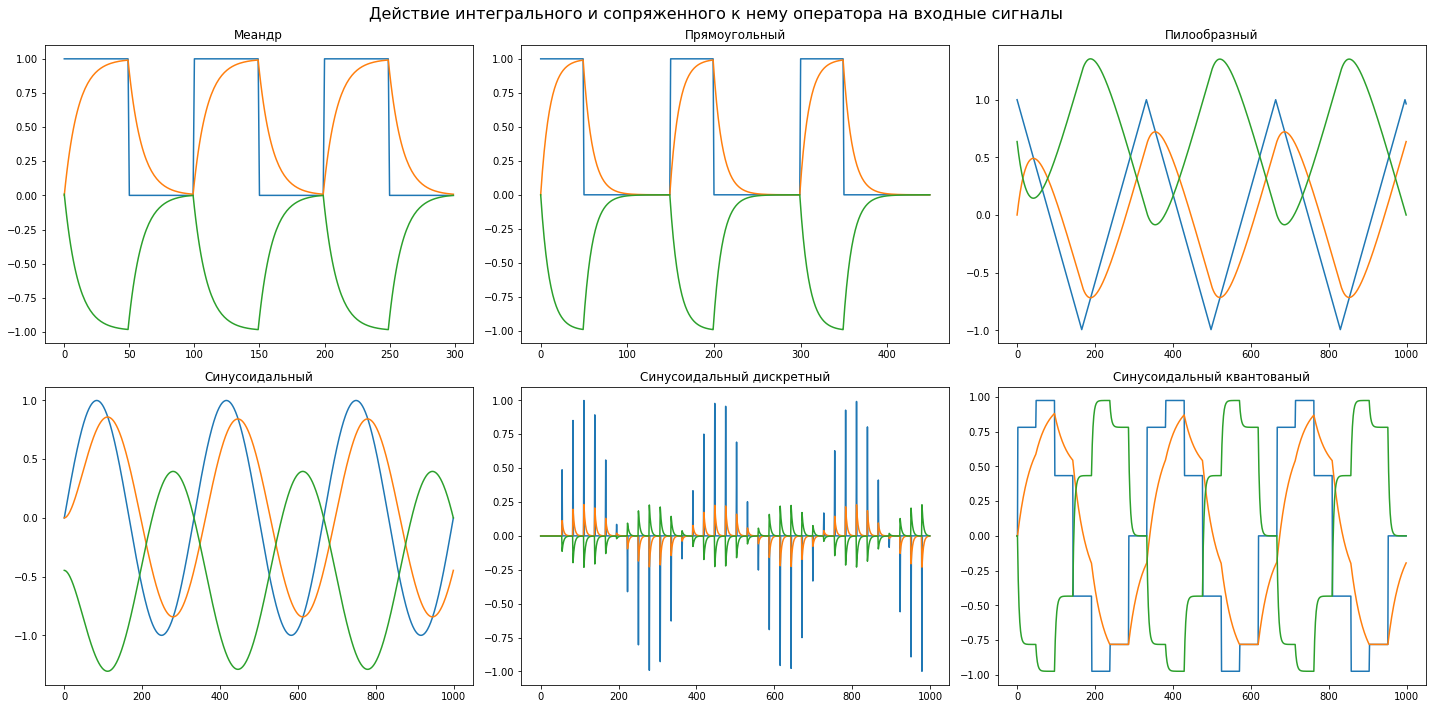

In [13]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

x = meander_in(100,3)
axs[0,0].plot(x)

axs[0,0].plot(A_RL(x,0.1))
axs[0,0].plot(Asopr_RL(A_RL(x,0.1)))
axs[0,0].set_title('Меандр')
x = rectang_in(100,3)
axs[0,1].plot(x)
axs[0,1].plot(A_RL(x,0.1))
axs[0,1].plot(Asopr_RL(A_RL(x,0.1)))
axs[0,1].set_title('Прямоугольный')
x2 = np.linspace(0, 36, 1000)
x= triang_in(x2.tolist(),3)[0:1000]
axs[0,2].plot(x)
axs[0,2].plot(A_RL(x,0.03))
axs[0,2].plot(Asopr_RL(A_RL(x,0.03)))
axs[0,2].set_title('Пилообразный')
x = sin_in(x2.tolist(),3)
axs[1,0].plot(x)
axs[1,0].plot(A_RL(x,0.03))
axs[1,0].plot(Asopr_RL(A_RL(x,0.03)))
axs[1,0].set_title('Синусоидальный')
x= discSin_in(x2.tolist(),1,3)[0:1000]
axs[1,1].plot(x)
axs[1,1].plot(A_RL(x,0.3))
axs[1,1].plot(Asopr_RL(A_RL(x,0.3)))
axs[1,1].set_title('Синусоидальный дискретный')
x = quantSin_in(x2.tolist(),7,3)[0:1000]
axs[1,2].plot(x)
axs[1,2].plot(A_RL(x,0.03))
axs[1,2].plot(Asopr_RL(A_RL(x,0.3)))
axs[1,2].set_title('Синусоидальный квантованый')
fig.suptitle('Действие интегрального и сопряженного к нему оператора на входные сигналы', fontsize=16)
plt.tight_layout()
plt.show()



#### Другой подход

In [16]:
def u_out_sopr(Uin, Uout_next, tau):
    return (Uout_next+tau*Uin)/(tau + 1) #(tau*Uin_next  + Uout)/(tau + 1)

In [15]:
def Asopr_RL( uin, tau):
    uout = np.zeros(len(uin))
    for i in range(len(uin) -2, 0, -1):
        uout[i] = u_out_sopr(uin[i],uout[i+1],tau)
    uout[0]= uout[1]
    return uout

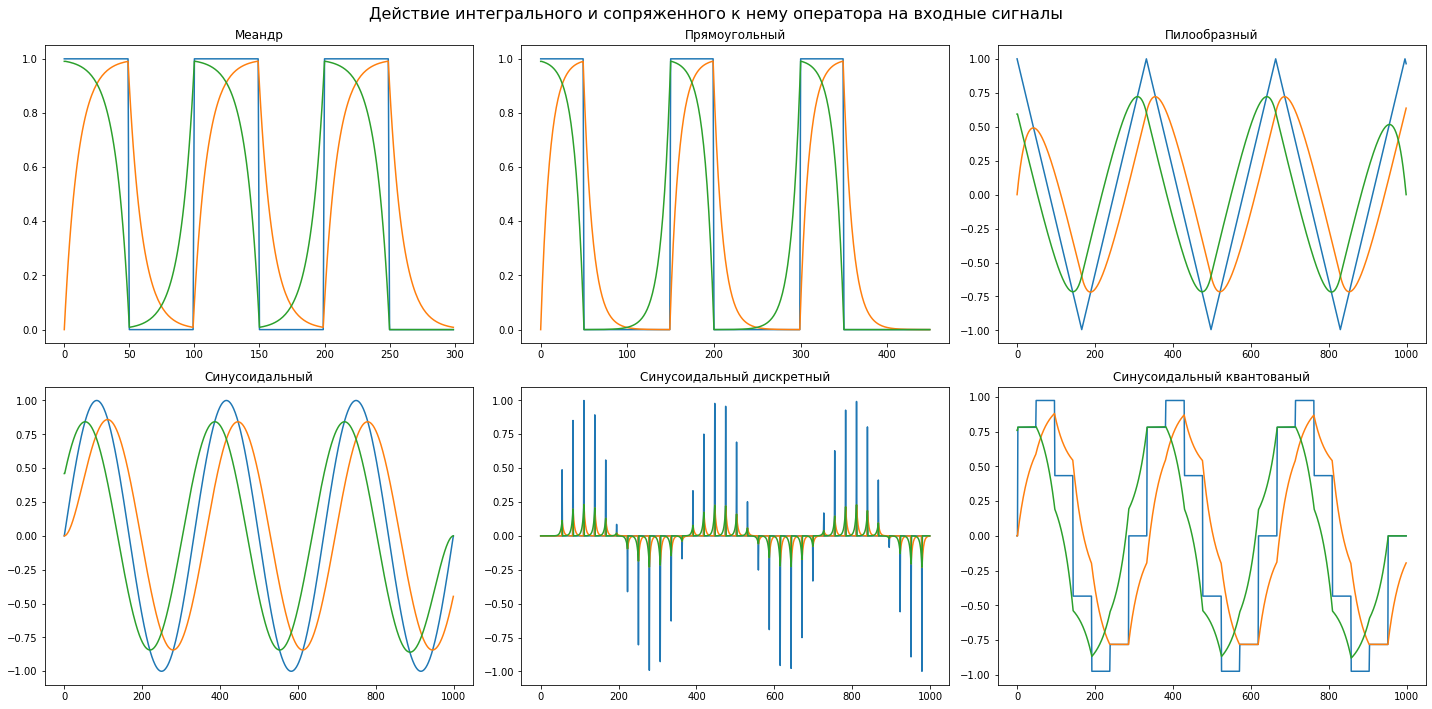

In [18]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

x = meander_in(100,3)
axs[0,0].plot(x)

axs[0,0].plot(A_RL(x,0.1))
axs[0,0].plot(Asopr_RL(x,0.1))
axs[0,0].set_title('Меандр')
x = rectang_in(100,3)
axs[0,1].plot(x)
axs[0,1].plot(A_RL(x,0.1))
axs[0,1].plot(Asopr_RL(x,0.1))
axs[0,1].set_title('Прямоугольный')
x2 = np.linspace(0, 36, 1000)
x= triang_in(x2.tolist(),3)[0:1000]
axs[0,2].plot(x)
axs[0,2].plot(A_RL(x,0.03))
axs[0,2].plot(Asopr_RL(x,0.03))
axs[0,2].set_title('Пилообразный')
x = sin_in(x2.tolist(),3)
axs[1,0].plot(x)
axs[1,0].plot(A_RL(x,0.03))
axs[1,0].plot(Asopr_RL(x,0.03))
axs[1,0].set_title('Синусоидальный')
x= discSin_in(x2.tolist(),1,3)[0:1000]
axs[1,1].plot(x)
axs[1,1].plot(A_RL(x,0.3))
axs[1,1].plot(Asopr_RL(x,0.3))
axs[1,1].set_title('Синусоидальный дискретный')
x = quantSin_in(x2.tolist(),7,3)[0:1000]
axs[1,2].plot(x)
axs[1,2].plot(A_RL(x,0.03))
axs[1,2].plot(Asopr_RL(x,0.03))
axs[1,2].set_title('Синусоидальный квантованый')
fig.suptitle('Действие интегрального и сопряженного к нему оператора на входные сигналы', fontsize=16)
plt.tight_layout()
plt.show()



### Через матрицу оператора

In [20]:
def Asopr_matrix(x,tau):
    size = len(x)
    basic = np.eye(size)
    operator = np.zeros((size,size))
    inx = 0
    for i in basic:
        operator[inx] = A_RL(i,tau)
        inx+=1
        
    return  np.dot(x,operator.T)

<Figure size 432x288 with 0 Axes>

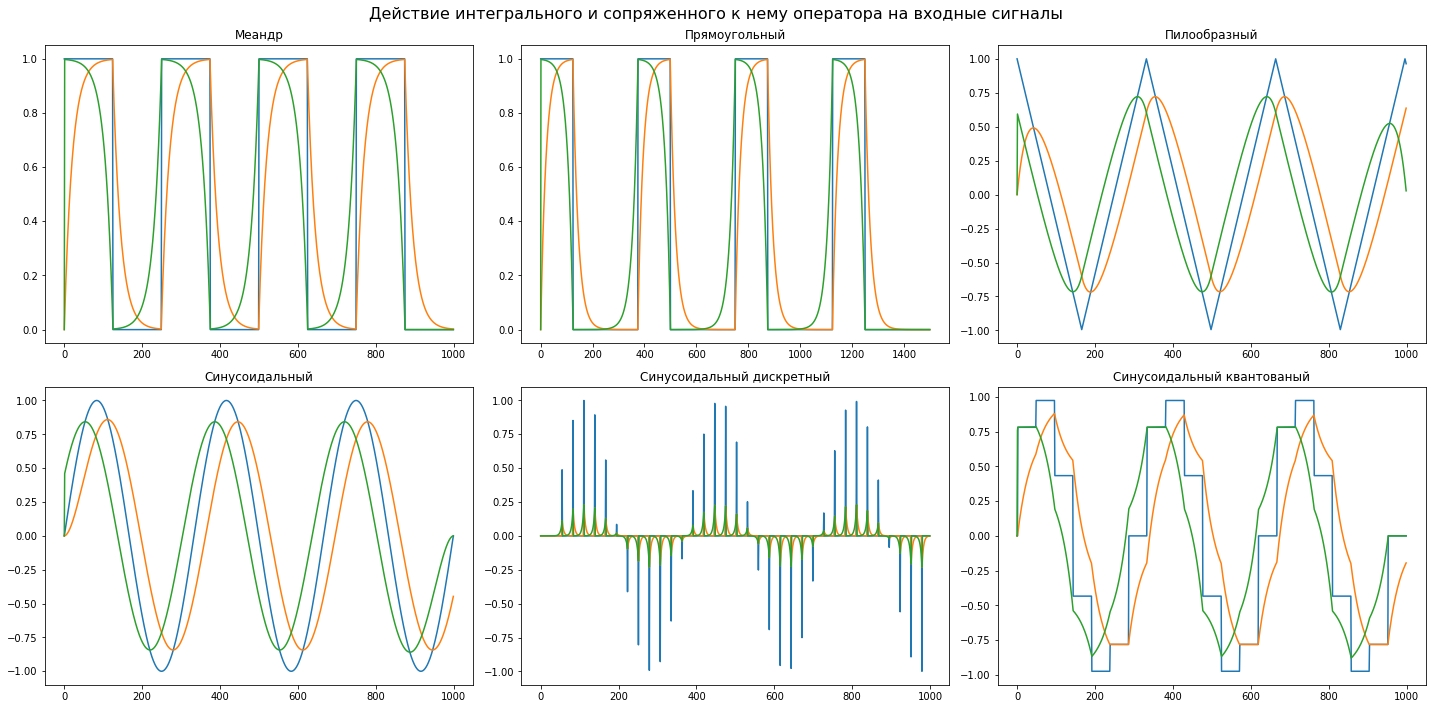

In [22]:
plt.clf()
fig, axs = plt.subplots(2,3,figsize=(20,10))

size = 1000

x = meander_in(size//4,4)
axs[0,0].plot(x)
axs[0,0].plot(A_RL(x,50/size))
axs[0,0].plot(Asopr_matrix(x,50/size))
axs[0,0].set_title('Меандр')
x = rectang_in(size//4,4)
axs[0,1].plot(x)
axs[0,1].plot(A_RL(x,50/size))
axs[0,1].plot(Asopr_matrix(x,50/size))
axs[0,1].set_title('Прямоугольный')
x2 = np.linspace(0, 36, size)
x= triang_in(x2.tolist(),3)[0:size]
axs[0,2].plot(x)
axs[0,2].plot(A_RL(x,30/size))
axs[0,2].plot(Asopr_matrix(x,30/size))
axs[0,2].set_title('Пилообразный')
x = sin_in(x2.tolist(),3)
axs[1,0].plot(x)
axs[1,0].plot(A_RL(x,30/size))
axs[1,0].plot(Asopr_matrix(x,30/size))
axs[1,0].set_title('Синусоидальный')
x= discSin_in(x2.tolist(),1,3)[0:size]
axs[1,1].plot(x)
axs[1,1].plot(A_RL(x,300/size))
axs[1,1].plot(Asopr_matrix(x,300/size))
axs[1,1].set_title('Синусоидальный дискретный')
x = quantSin_in(x2.tolist(),7,3)[0:1000]
axs[1,2].plot(x)
axs[1,2].plot(A_RL(x,0.03))
axs[1,2].plot(Asopr_matrix(x,0.03))
axs[1,2].set_title('Синусоидальный квантованый')
fig.suptitle('Действие интегрального и сопряженного к нему оператора на входные сигналы', fontsize=16)
plt.tight_layout()
plt.show()

* для 1к   элементов - 4.2s</br>
* для 10к  элементов - 6m 5s</br>
* для 60к элементов - **MemoryError: Unable to allocate 26.8 GiB for an array with shape (60000, 60000) and data type float64</br>**
* для 100к элементов - **MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64</br>**
* для 1m   элементов - **MemoryError: Unable to allocate 7.28 TiB for an array with shape (1000000, 1000000) and data type float64</br>**

# Разумное решение

$$ A^{*}x = \sum^n_i (A^{*}x_i,e_i)e_i$$
$$ (A^{*}x_i, e_i) = (x_i, Ae_i) $$
$$ A^{*}x = \sum^n_i (x_i, Ae_i) e_i$$

In [405]:
def Asopr_sum(x,tau):
    size = len(x)

    c=np.zeros(size)
    for i in range(size):
        basic = [.0]*size
        basic[i]=1
        basic = np.array(basic)
        c+=np.dot(x, A_RL(basic,tau))*basic
        
    return  c

Text(0.5, 1.0, 'Меандр')

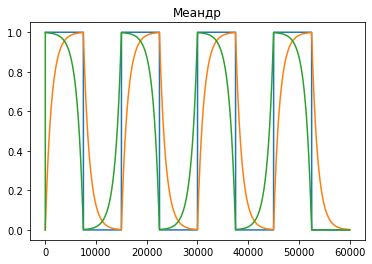

In [422]:
size = 60000

x = meander_in(size//4,4)
plt.plot(x)

plt.plot(A_RL(x,50/size))
plt.plot(Asopr_sum(x,50/size))
plt.title('Меандр')

* для 1к   элементов - 0.8s</br>
* для 10к  элементов - 1m 14s</br>
* для 60к  элементов - 45m 55.9s</br>